In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os 
from PIL import Image

In [2]:
train_clean = "D:/machine learning project dataset/images/train/clean/"
train_messy= "D:/machine learning project dataset/images/train/messy/"
test_messy= "D:/machine learning project dataset/images/val/messy/"
test_clean= "D:/machine learning project dataset/images/val/clean/"
image_size = 128

In [3]:
def trainer_data():
    train_messy_room=[]
    train_clean_room=[]
    for image1 in (os.listdir(train_messy)):
        path=os.path.join(train_messy,image1)
        img1=cv2.imread(path)
        train_messy_room.append(img1)
    for image2 in (os.listdir(train_clean)):
        path=os.path.join(train_clean,image2)
        img2=cv2.imread(path)    
        train_clean_room.append(img2)
    training_data=np.concatenate((np.asarray(train_messy_room),np.asarray(train_clean_room))) 
    return training_data

In [4]:
def tester_data():
    test_messy_room=[]
    test_clean_room=[]
    for image1 in (os.listdir(test_messy)):
        path=os.path.join(test_messy,image1)
        img1=cv2.imread(path)
        test_messy_room.append(img1)
    for image2 in (os.listdir(test_clean)):
        path=os.path.join(test_clean,image2)
        img2=cv2.imread(path)    
        test_clean_room.append(img2)
    tests_data=np.concatenate((np.asarray(test_messy_room),np.asarray(test_clean_room))) 
    return tests_data

In [5]:
training_data=trainer_data()
testing_data=tester_data()

In [6]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image in (os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in (os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)))
    return train_data 

In [7]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in (os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in (os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean))) 
    return test_data 

In [8]:
train_data = train_data() 
test_data = test_data()

In [9]:
x_data=np.concatenate((train_data,test_data),axis=0)

In [10]:
x_data1=np.concatenate((training_data,testing_data))

In [11]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [12]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [13]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)
print("X1 shape: " , x_data1.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)
X1 shape:  (212, 299, 299, 3)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [15]:
from sklearn.model_selection import train_test_split
a,x_test1,b,c = train_test_split(x_data1, y_data, test_size=0.15, random_state=42)
number_of_test = x_test1.shape[0]

In [16]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
x_test1_flatten = x_test1 .reshape(number_of_test,x_test1.shape[1]*x_test1.shape[2]*3)
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)
print("X test1 flatten",x_test1_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)
X test1 flatten (32, 268203)


In [17]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test
y_train = y_train
x_test1=x_test1_flatten
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("x test1: ",x_test1.shape)

x train:  (180, 16384)
x test:  (32, 16384)
y train:  (180, 1)
y test:  (32, 1)
x test1:  (32, 268203)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
model.score(x_test, y_test)

0.90625

In [26]:
ans=model.predict(x_test[:32])
ans

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.])

In [27]:
ans_1=list(map(lambda x:"Messy" if x else "Clean",ans))

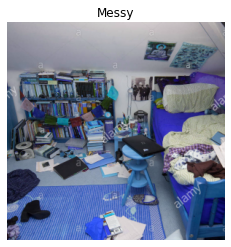

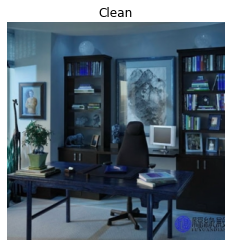

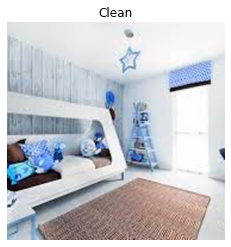

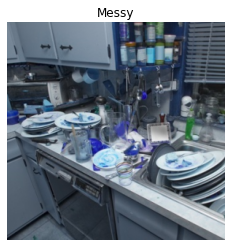

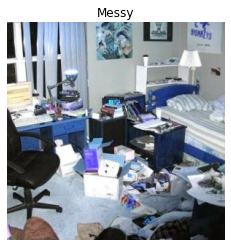

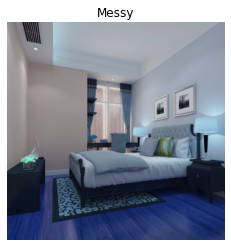

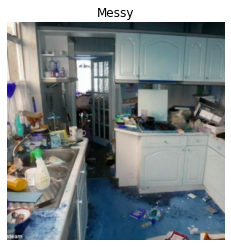

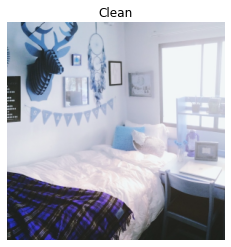

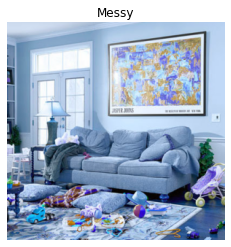

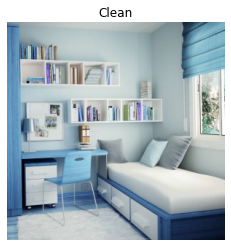

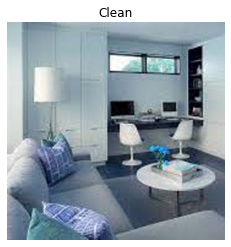

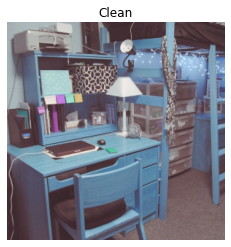

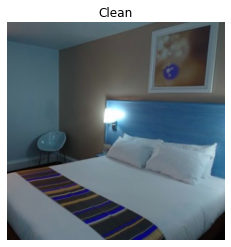

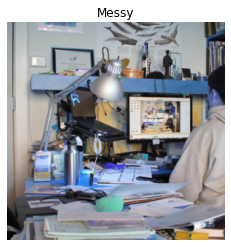

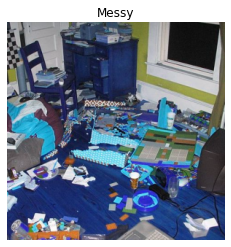

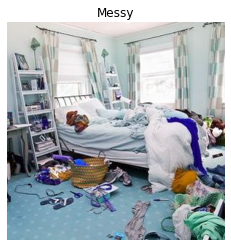

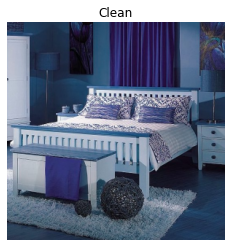

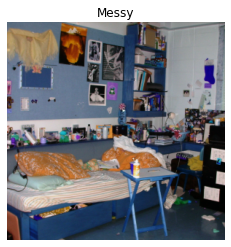

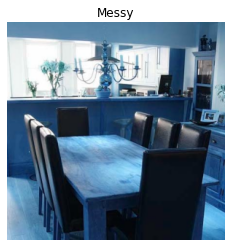

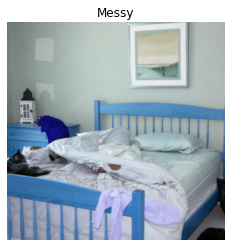

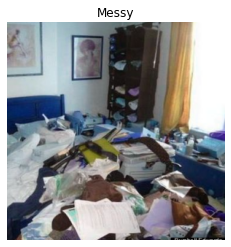

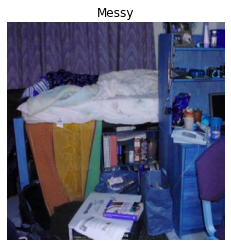

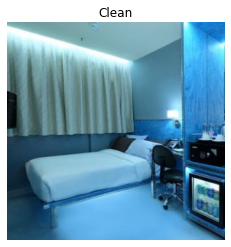

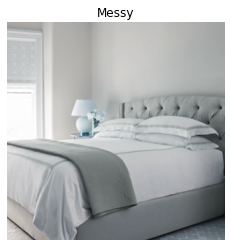

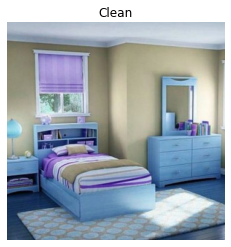

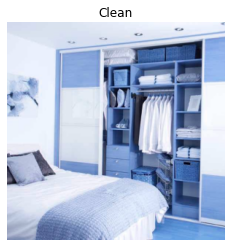

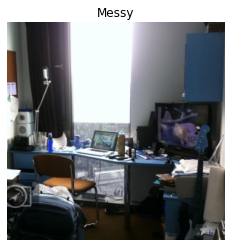

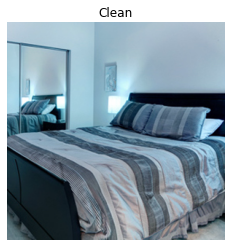

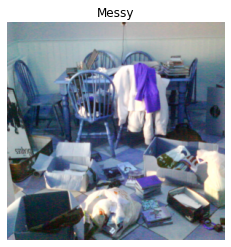

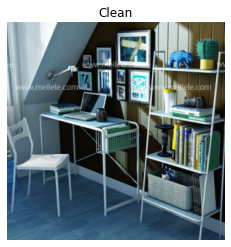

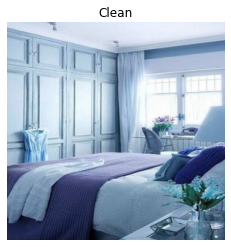

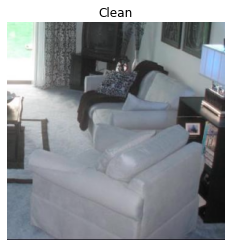

In [28]:
for i in range (len(ans)):
    plt.imshow(x_test1[i].reshape(299,299,3))
    plt.axis("off")
    plt.title(ans_1[i])
    plt.show()

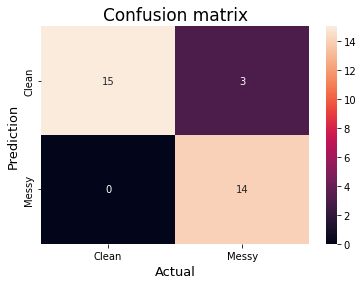

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# predicted = np.array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0.])
# actual = np.array([1., 0., 0., 1., 1., 0., 1., 0., 1., 0.])
cm = confusion_matrix(y_test,ans)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = ['Clean','Messy'], yticklabels = ['Clean','Messy'])
plt.ylabel("Prediction",fontsize=13)
plt.xlabel("Actual",fontsize=13)
plt.title("Confusion matrix",fontsize=17)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_absolute_error,mean_squared_error
accuracy = accuracy_score(y_test,ans)
precision= precision_score(y_test,ans)
recall   = recall_score(y_test,ans)
f1       = f1_score(y_test,ans)
mae      = mean_absolute_error(y_test,ans)
mse      = mean_squared_error(y_test,ans)
print("Accuracy : ",accuracy)
print("Precision: ",precision)
print("Recall   : ",recall)
print("F1 score : ",f1)
print("Mean absolute error   : ",mae)
print("Mean squared error : ",mse)

Accuracy :  0.90625
Precision:  0.8235294117647058
Recall   :  1.0
F1 score :  0.9032258064516129
Mean absolute error   :  0.09375
Mean squared error :  0.09375


<h1>Testing custom images<h1>

In [33]:
test_1="D:/machine learning project dataset/images/test/"

In [34]:
def test():
    test_image=[]
    for image1 in (os.listdir(test_1)):
        path=os.path.join(test_1,image1)
        img1=cv2.imread(path)
        test_image.append(img1)
    test_data=np.asarray(test_image)
    return test_data

In [35]:
test_data=test()

In [36]:
def testable_data():
    test_image_1 = [] 
    for image in (os.listdir(test_1)): 
        path = os.path.join(test_1, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_image_1.append(img1)     
    testing_data= np.asarray(test_image_1)
    return testing_data 

In [37]:
testing = testable_data()

In [38]:
data_t=testing
print(data_t.shape)

(10, 128, 128)


In [39]:
data_t1=test_data
print(data_t1.shape)

(10, 299, 299, 3)


In [40]:
number_of_testing = data_t.shape[0]
number_of_testing1 = data_t1.shape[0]

In [41]:
test_flatten = data_t.reshape(number_of_testing,data_t.shape[1]*data_t.shape[2])
testing_flatten = data_t1 .reshape(number_of_testing1,data_t1.shape[1]*data_t1.shape[2]*3)


print("Test flatten",test_flatten.shape)
print("Testing flatten",testing_flatten.shape)

Test flatten (10, 16384)
Testing flatten (10, 268203)


In [42]:
custom_test = test_flatten
custom_test1 = testing_flatten

In [43]:
ans=model.predict(custom_test[:10])
#ans=[0,0,1,0,1,1,0,1,1,0]

In [44]:
ans=list(map(lambda x:"Messy" if x else "Clean",ans))

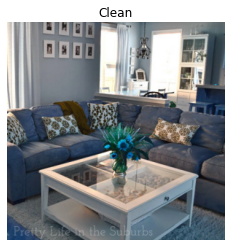

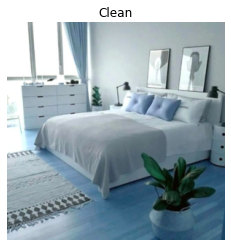

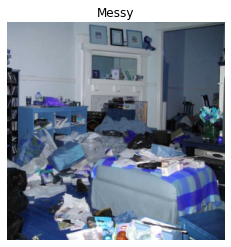

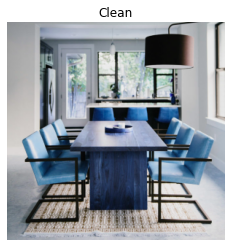

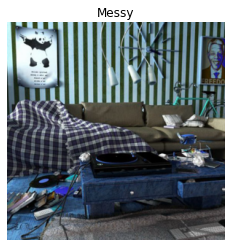

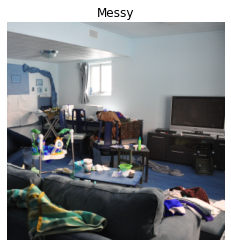

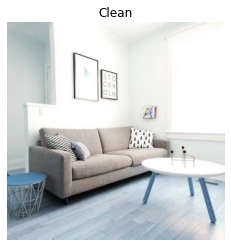

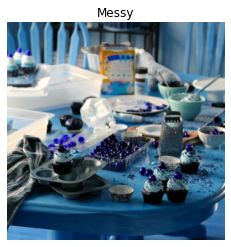

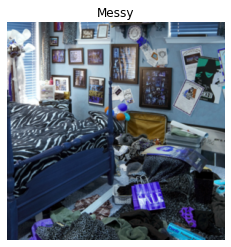

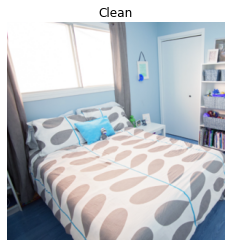

In [45]:
for i in range (len(ans)):
    plt.imshow(custom_test1[i].reshape(299,299,3))
    plt.axis("off")
    plt.title(ans[i])
    plt.show()